# **Question 1** - Diffused-Limit Aggregation

## **a. Random Walk**

Model a random walk of $N = 10^4$ particles on an $n \times n$ grid. At each timestep, a particle can either stay still or move to one of it's 8 neighbouring cells.

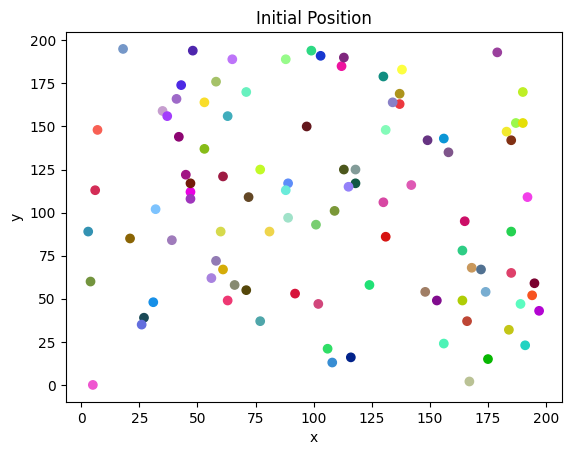

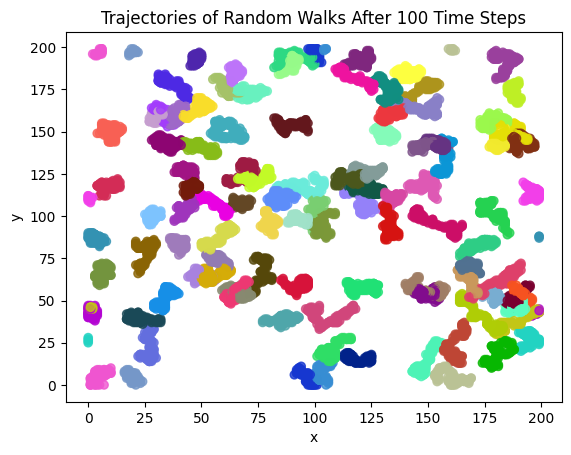

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def random_walk(time_steps, N = 500, n = 200, plot = True):
    '''Random Walk in 2D
    Inputs:
    dt: number of time steps
    N: Number of particles
    n: size of the grid
    plot: whether to plot the trajectories or not

    Outputs:
    Returns the distance travelled per particle
    '''

    # Create nxn matrix
    grid = np.zeros((n,)*2)


    # Randomly place particles in the grid
    x = np.random.randint(0, n, size=N)
    y = np.random.randint(0, n, size=N)

    # Store the initial positions
    x_history = [x]
    y_history = [y]

    # Fill the grid with 1s where the particles are
    for i in range(N):
        grid[x[i]][y[i]] = 1

    for dt in range(time_steps):
        x = x + np.random.randint(-1, 2, size=N)
        y = y + np.random.randint(-1, 2, size=N)

        # Periodic Boundary Conditions
        x = np.mod(x, n)
        y = np.mod(y, n)

        x_history += [x]
        y_history += [y]

        # New Grid
        grid = np.zeros((n,)*2)
        for i in range(N):
            grid[x[i]][y[i]] = 1

    if plot:
            # Colours for each particle
        c = ['#%06X'.lower() % np.random.randint(0, 0xFFFFFF) for i in range(N)]

        # Plot the Initial positions
        plt.figure(1)
        plt.scatter(x_history[0], y_history[0], color = c)
        plt.title("Initial Position")
        plt.xlabel("x")
        plt.ylabel("y")

        # Plot the (x, y) indices that are 1
        plt.figure(2)
        plt.title(f"Trajectories of Random Walks After {time_steps} Time Steps")
        plt.xlabel("x")
        plt.ylabel("y")
        for ts in range(time_steps):
            plt.scatter(x_history[ts], y_history[ts], color = c, alpha = 0.8)

    dist = np.sqrt((x_history[-1] - x_history[0])**2 + (y_history[-1] - y_history[0])**2)

    return dist

random_walk(100, N = 100);

Text(0, 0.5, 'Mean Distance Travelled')

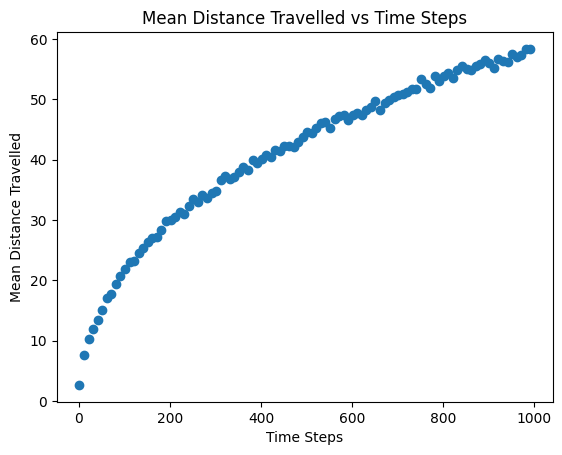

In [2]:
time_steps = [a for a in range(1, 1000, 10)]
dist = []
for dt in time_steps:
    dist.append(np.mean(random_walk(dt, N = int(1E4), n = 200, plot = False)))

plt.scatter(time_steps, dist)
plt.title("Mean Distance Travelled vs Time Steps")
plt.xlabel("Time Steps")
plt.ylabel("Mean Distance Travelled")

Cool!

## **b. Solid Seed**

Now, create a solid seed in the centre of the grid. Anytime a randomly walking particle finds itself next to the seed, that particle joins the solid seed. Evolve this random walk until 80% of the randomly walking particles have joined the solid.

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def adjacent_solid(liquid_x, liquid_y, solid_x, solid_y):
    '''Checks if the particle is adjacent to the solid object
    Inputs:
    x: x array of the particle positions
    y: y array of the particle positions
    solid_x: x positions of the solid object
    solid_y: y positions of the solid object

    Outputs:
    Returns True if the particle is inside the solid object, False otherwise
    '''
    adj_x = [] # Stores the values from the x array
    adj_y = [] # Stores the values from the y array
    adj_indices = np.array([], dtype = int) # Stores the indices of the adjacent particles

    # Use np.where to search for adjacent particles
    for i in range(len(solid_y)):
        x = solid_x[i]
        y = solid_y[i]

        temp_adj_x_indices = []
        temp_adj_y_indices = []

        # Get indices of x or y that are adjacent to the solid object
        temp_adj_x_indices = list(np.where(liquid_x == x + 1)[0]) + list(np.where(liquid_x == x)[0]) + list(np.where(liquid_x == x - 1)[0])
        temp_adj_y_indices = list(np.where(liquid_y == y + 1)[0]) + list(np.where(liquid_y == y)[0])  + list(np.where(liquid_y == y - 1)[0])

        # Find common elements between temp_adj_x_indices and temp_adj_y_indices
        common_indices = np.intersect1d(temp_adj_x_indices, temp_adj_y_indices)
        if len(common_indices) > 0 and np.intersect1d(adj_indices, common_indices).size == 0:
            adj_indices = np.concatenate((adj_indices, common_indices.copy()), axis = None)

        for el in common_indices:
            common_x = liquid_x[el]
            common_y = liquid_y[el]

            if common_x not in adj_x and common_y not in adj_y:
                adj_x.append(common_x.copy())
                adj_y.append(common_y.copy())

    
    if len(adj_indices) > 0:
        if len(adj_x) == len(adj_y):
            # Add adjacent particles to the solid list
            solid_x += adj_x.copy()
            solid_y += adj_y.copy()
            # Remove adjacent particles from the liquid list
            liquid_x = np.delete(liquid_x, adj_indices)
            liquid_y = np.delete(liquid_y, adj_indices)

        else:
            print(adj_x, adj_y)
            print("Error: adj_x and adj_y are not the same length. Cant add to the solid list/remove from the liquid list")
    # else:
    #     print(f"No adjacent particles: {adj_indices}")

    return liquid_x, liquid_y, solid_x, solid_y
    
def random_walk_solid(N = 500, n = 200, plot = True, plot_steps = 50, lim = 1000):
    '''Random Walk in 2D
    Inputs:
    dt: number of time steps
    N: Number of particles
    n: size of the grid
    plot: whether to plot the trajectories or not

    Outputs:
    Returns the distance travelled per particle
    '''

    time_steps = 0

    # Create nxn matrix
    grid = np.zeros((n,)*2)

    # Place a solid object in the middle (9 particles)
    solid_x = [] # Keep track of the indicies of the solid object
    solid_y = []

    for i in range(-1, 2):
        for j in range(-1, 2):
            solid_x.append(n//2 + i)
            solid_y.append(n//2 + j)
            grid[n//2 + i][n//2 + j] = 1


    
    # Randomly place particles in the grid
    x = np.random.randint(0, n-1, size=N)
    y = np.random.randint(0, n-1, size=N)

    x_history = [x.copy()]
    y_history = [y.copy()]

    solid_x_history = [solid_x.copy()]
    solid_y_history = [solid_y.copy()]

    # Check if the particles are in the solid object
    delete_indices = np.where(np.isin(x, solid_x) & np.isin(y, solid_y))[0]
    
    # Remove from particle list
    x = np.delete(x, delete_indices)
    y = np.delete(y, delete_indices)
    
    # Check if any initial positions are adjacent to the solid object
    x, y, solid_x, solid_y = adjacent_solid(x, y, solid_x, solid_y)

    # Store the initial positions
    x_history.append(x.copy())
    y_history.append(y.copy())

    solid_x_history.append(solid_x.copy())
    solid_y_history.append(solid_y.copy())


    for i in range(0, len(x)):
        grid[x[i]][y[i]] = 1

    while len(x)/N > 0.8 and time_steps < lim:
        time_steps += 1
        x = x + np.random.randint(-1, 2, size=len(x))
        y = y + np.random.randint(-1, 2, size=len(y))

        # Wrap around
        x = np.mod(x, n)
        y = np.mod(y, n)

        # Check for adjacency
        x, y, solid_x, solid_y = adjacent_solid(x, y, solid_x, solid_y)

        # Store the positions
        x_history.append(x.copy())
        y_history.append(y.copy())

        solid_x_history.append(solid_x.copy())
        solid_y_history.append(solid_y.copy())

        # New Grid
        grid = np.zeros((n,)*2)
        for i in range(0, len(x)):
            grid[x[i]][y[i]] = 1

    if plot:
        for ts in range(0, len(x_history), plot_steps):
            # Plot the (x, y) indices that are 1
            plt.tight_layout()
            plt.figure(ts+2, figsize = (5, 5))
            plt.title(f"State of System after {ts} Time Steps")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.xlim(0, n)
            plt.ylim(0, n)
            plt.scatter(x_history[ts], y_history[ts], s = 1, marker = 's', alpha=0.5, color = 'b') # Plot the particles
            plt.scatter(solid_x_history[ts], solid_y_history[ts], s = 1, color = 'black', marker = "s") # Plot the solid object
        
        # Plot the Final positions
        plt.figure(len(x_history)+2)
        plt.scatter(x_history[-1], y_history[-1], s = 1, marker = 's', alpha=0.5, color = 'b') # Plot the particles
        plt.scatter(solid_x_history[-1], solid_y_history[-1], s = 1, color = 'black', marker = "s") # Plot the solid object
        plt.title(f"Final Position after {len(x_history)} Time Steps")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim(0, n)
        plt.ylim(0, n)

    print(f"Took {time_steps} time steps to crystallise beyond {len(x)/N*100:.1f}% with {N} particles and a grid size of {n}x{n}")
    return solid_x_history, solid_y_history, x_history, y_history, time_steps

num_liquid_particles = 50
grid_size = 50
solid_x_history, solid_y_history, x_hist, y_hist, time_steps = random_walk_solid(N = num_liquid_particles, n = grid_size, plot = False, plot_steps = 50)

Took 103 time steps to crystallise beyond 80.0% with 50 particles and a grid size of 50x50


With N = $10^4$ particles in a 200x200 grid, how many time steps until the 80% of the liquid particles have solidified?

Took 216 time steps to crystallise beyond 80.0% with 10000 particles and a grid size of 200x200


<Figure size 640x480 with 0 Axes>

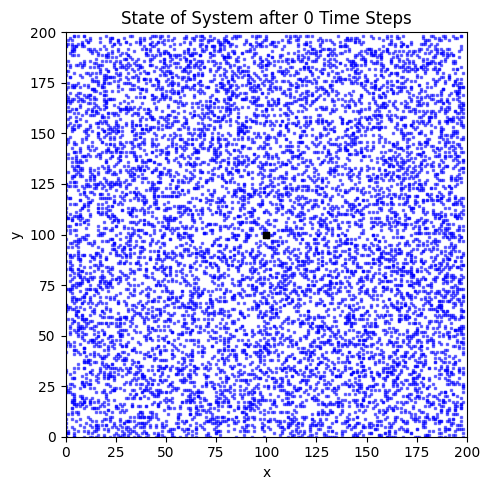

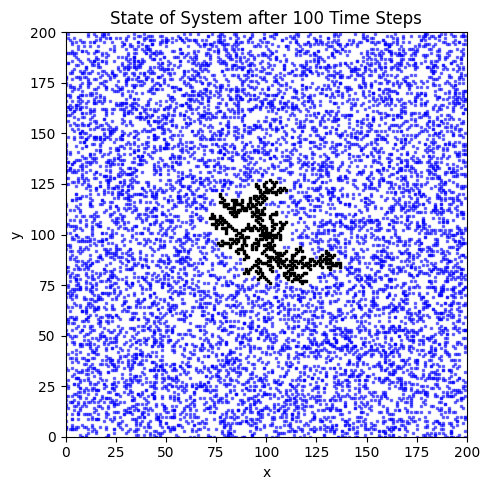

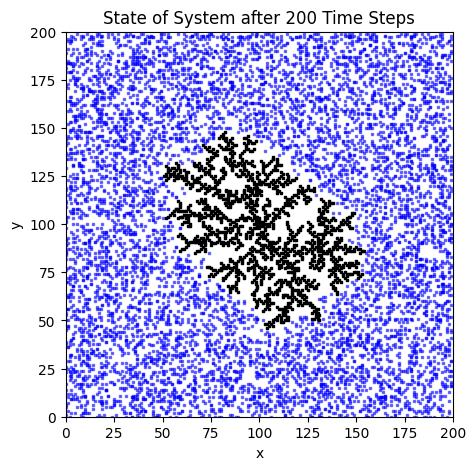

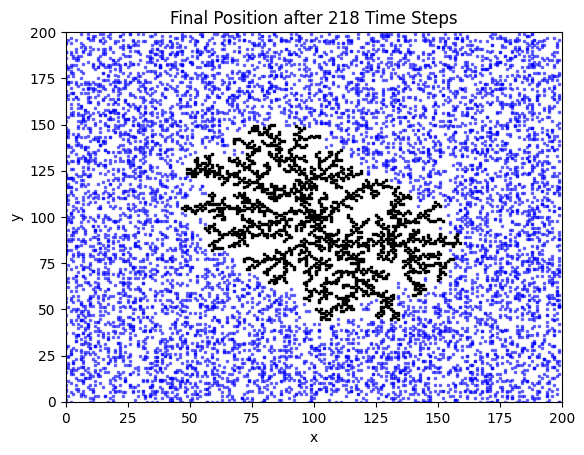

In [27]:
solid_x_history, solid_y_history, x_hist, y_hist, time_steps = random_walk_solid(N = int(1E4), n = 200, plot = True, plot_steps = 100, lim = 1000)

## **c. $N_{solid}$ Varying with Time**

Plot the number of solid particles against time.

In [29]:
solid_x_history, solid_y_history, x_hist, y_hist, time_steps = random_walk_solid(N = int(1E4), n = 200, plot = False, plot_steps = 100, lim = 1000)

Took 241 time steps to crystallise beyond 79.9% with 10000 particles and a grid size of 200x200


Text(0, 0.5, 'Time Steps')

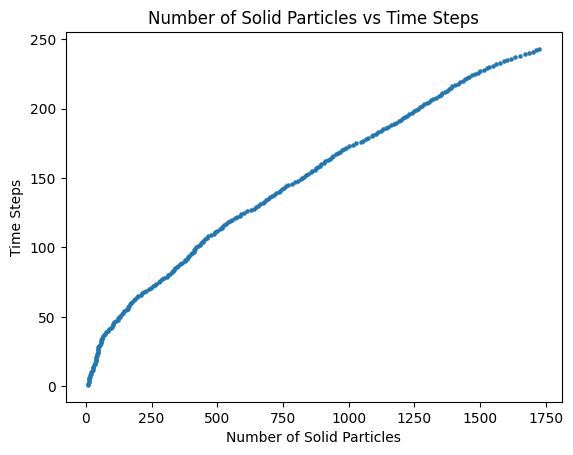

In [45]:
num_solid_particles = [len(x) for x in solid_x_history]
time_steps_list = [i for i in range(1, len(num_solid_particles) + 1)]
plt.figure(1)
plt.scatter(num_solid_particles, time_steps_list, s = 5)
plt.title("Number of Solid Particles vs Time Steps")
plt.xlabel("Number of Solid Particles")
plt.ylabel("Time Steps")

If you compare this to the "Mean Distance Travelled per Particle" plot from part a, it's pretty clear that these share a very similar shape. This makes sense since the more each particle travels, the more likely it finds itself next to the solid (and thus crystallising).

# **Question 2** - Ising Model

The Ising model is a simple model of a ferromagnetic material in which a lattice of spins interact via nearest-neighbour interactions. In 2D, we have a square lattice with $n \times n = N$ lattice sites on which the spins sit. Each spin can be either up (s = +1) or down (s = -1), and the total energy of the system is $$ E = -\sum_{nn} s_is_j$$
where "nn" in the sum indicates that the sum is over nearest-neighbour pairs. Any given spin interact only withg the spins that are immediately up, down, left, and right from its location. We can see that the energy will be minimised when neighbouring spins are aligned. For any given configuration of spins, the total magnetisation is $$M = \sum_i s_i$$

At temperature T, the probability that the system is in a configuration with energy E is given by the Boltzmann distribution: $$Prob(E) \propto exp(-E/k_BT)$$

To calculate the magnetisation at a given temperature, we need to sample the possible configurations from this probability distribution and then we can average over them to find the mean magnetisation $<M>$ as a function of temperature. Since energy $E$ depends on values of $N$ spins $\{s_i\}$, we are dealing with an N-dimensional parameter space (with $2^N$ possible sample points), and so this is an example where Monte Carlo methods are needed to sample from the probability distribution.

## **a. Generate a Sample of Configurations**

Use the Metropolis-Hastings algorithm to generate a sample of configurations $\{s_i\}$ from the Boltzmann distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def boltzmann_probability(delta_energy, temperature):
    # Temperature is actually kbT
    return np.exp(-delta_energy / temperature)

# Calculate the magnetisation
def calculate_magnetisation(lattice):
    return np.sum(lattice)

# Perform the Iterations
def metropolis_hastings(n = 10, num_steps = int(1E6), temperature = 0.65, plot = True):
    lattice = np.random.choice([-1, 1], size=(n, n))# Initialize the lattice with random spins (+1 or -1)

    magnetisations = []

    # Metropolis-Hastings sampling
    for step in range(num_steps):
        i, j = np.random.randint(0, n, size=2)
        lattice[i, j] *= -1 # Flip the spin

        # Delta E = 2s_i * (S_up + S_down + S_left + S_right)
        delta_energy = 2 * lattice[i, j] * (lattice[(i - 1) % n, j] + lattice[(i + 1) % n, j] + lattice[i, (j - 1) % n] + lattice[i, (j + 1) % n]) # Change in energy

        if delta_energy <= 0 or np.random.rand() < boltzmann_probability(delta_energy, temperature):
            magnetisations.append(calculate_magnetisation(lattice)) # Store the magnetisation
        else:
            lattice[i, j] *= -1 # Flip the spin back
    
    if plot:
        # Plot the magnetisation values
        plt.plot(magnetisations, linewidth=0.75)
        plt.xlabel("Iterations")
        plt.ylabel("Magnetisation")
        plt.title(f"Magnetisation per Iteration at (T = {temperature}K)")
        plt.show()

    return magnetisations

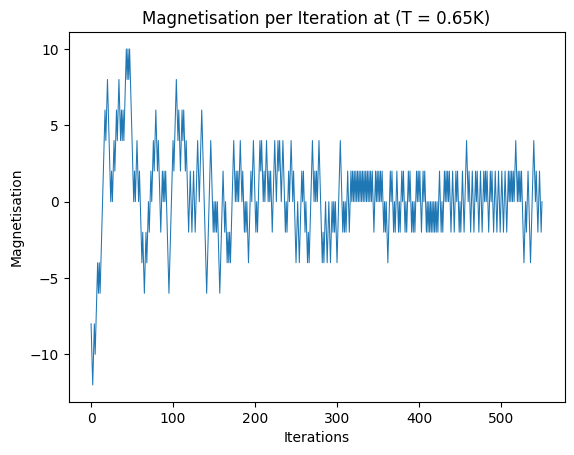

In [54]:
n = 10  # Size of the lattice (e.g., 10x10)
num_steps = int(1E6)
temperature = 0.65 # Kelvin
mag_array = metropolis_hastings(n, num_steps, temperature)

## **b. M vs T**

Make a plot of the Magnetisation chains for different temperatures in the range $k_BT$ = 1 to 4.

In [79]:
temp_list = np.linspace(1, 4, 5) # Range of kbT values
mag_list = [] # Store the magnetisation arrays
n = 10
num_steps = 1000

for temp in temp_list:
    mag_list.append(metropolis_hastings(n, num_steps, temp, plot = False))

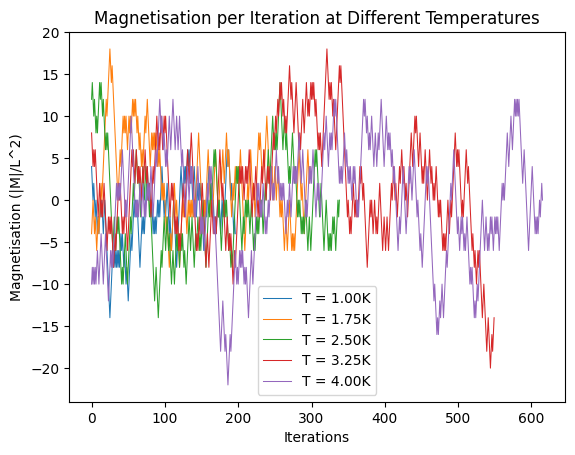

In [80]:
plt.figure(1)
for mag in mag_list:
    plt.plot(mag, label = f"T = {temp_list[mag_list.index(mag)]:.2f}K", linewidth=0.75)
    plt.xlabel("Iterations")
    plt.ylabel("Magnetisation (|M|/L^2)")
    plt.title("Magnetisation per Iteration at Different Temperatures")
    plt.legend()

## **c. Characterization**

Plot the mean Magnetisation and the variance as a function of temperature.

Text(0.5, 1.0, 'Variance of Magnetisation')

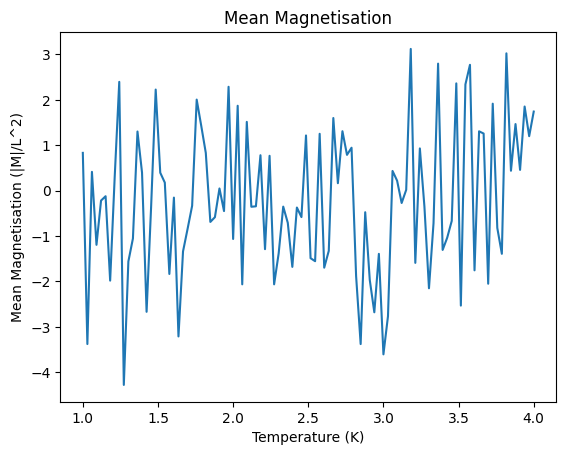

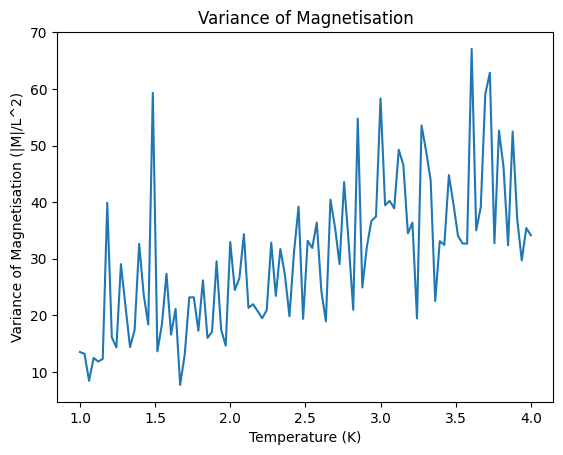

In [74]:
mean_mag_list = np.array([])
var_mag_list = np.array([])

for mag in mag_list:
    mean_mag_list = np.append(mean_mag_list, np.mean(mag))
    var_mag_list = np.append(var_mag_list, np.var(mag))

plt.figure(2)
plt.plot(temp_list, mean_mag_list)
plt.xlabel("Temperature (K)")
plt.ylabel("Mean Magnetisation (|M|/L^2)")
plt.title("Mean Magnetisation")

plt.figure(3)
plt.plot(temp_list, var_mag_list)
plt.xlabel("Temperature (K)")
plt.ylabel("Variance of Magnetisation (|M|/L^2)")
plt.title("Variance of Magnetisation")